## Linear Regression on AirBNB cleaned data

In [7]:
# data structure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sma
from sklearn import metrics
import pickle
import sklearn.metrics as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
df = pd.read_csv('data/airbnbcleaned.csv')

In [9]:
df.columns

Index(['id', 'host_id', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'reviews_per_month', 'price_per_neighbourhood', 'total_rooms'],
      dtype='object')

removing columns that are irrelevant for this purpose

In [10]:
df = df.drop(['id','host_id'], axis=1)

In [11]:
pd.set_option('display.max_columns',50)

In [12]:
df.sample(10)

,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,price_per_neighbourhood,total_rooms
16238,86.000000,0,1.0,1,1,1,2,1,2,1.0,2.0,1350.000000,3,16,231,6,5.000000,0,0.500000,1277.845801,3.0
10043,100.000000,1,6.0,1,1,7,2,1,4,1.0,2.0,565.000000,3,365,59,0,4.818525,1,0.733238,1197.425433,3.0
8351,96.000000,1,1.0,1,1,1,2,1,4,1.0,2.0,2970.000000,3,14,180,38,5.000000,0,2.120000,1277.845801,3.0
706,67.000000,0,1.0,1,1,4,2,1,2,1.0,1.0,1320.467531,3,20,0,2,5.000000,0,0.170000,1308.120232,2.0
5078,67.000000,0,8.0,1,1,8,3,2,2,0.5,1.0,1320.467531,3,1125,0,16,4.750000,0,0.180000,1092.050544,1.5
2039,100.000000,0,1.0,0,1,4,1,1,2,1.0,1.0,1500.000000,3,7,55,2,5.000000,0,0.550000,1308.120232,2.0
4406,90.000000,0,1.0,1,1,1,2,1,5,1.0,3.0,1320.467531,2,14,0,14,4.930000,0,0.210000,1277.845801,4.0
15566,71.554308,0,1.0,1,0,3,1,1,6,1.0,6.0,1780.000000,2,1125,361,1,5.000000,0,0.030000,1619.909102,7.0
12475,43.000000,1,1.0,1,1,6,1,1,2,1.0,1.0,921.000000,4,14,360,16,4.880000,0,0.250000,1308.079116,2.0
5279,85.000000,1,2.0,1,1,7,1,1,4,1.0,2.0,841.000000,4,1125,61,192,4.800000,0,1.900000,1197.425433,3.0


In [13]:
#df = pd.get_dummies(df, columns=['neighbourhood_cleansed', 'property_type', 'room_type'])

In [14]:
df['reviews_per_month']

0        0.733238
1        3.330000
2        3.750000
3        0.590000
4        1.210000
           ...   
16266    0.930000
16267    1.530000
16268    0.733238
16269    0.910000
16270    0.570000
Name: reviews_per_month, Length: 16271, dtype: float64

In [15]:

X = df['price'].values.reshape(-1,1)
y = df['reviews_per_month'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_lin_predict = lin_model.predict(X_test)
y_lin_predict

array([[0.68652825],
       [0.73472488],
       [0.70094969],
       ...,
       [0.53960887],
       [0.70094969],
       [0.68652825]])

In [17]:
a = lin_model.coef_
b = lin_model.intercept_
print(len(X))
print(len(y))


16271
16271


In [18]:
R2 = lin_model.score(X,y)
R2


0.004321737776990964

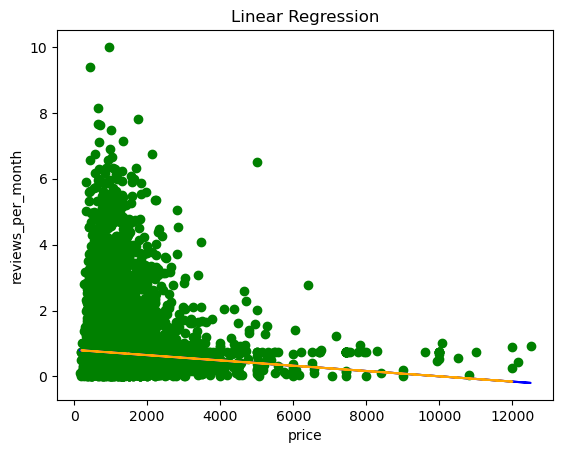

In [19]:
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_lin_predict, color='orange')
plt.xlabel('price')
plt.ylabel('reviews_per_month')
plt.show()

Testing with known data, predicting with unknown data

In [20]:
price_predict = lin_model.predict([[2000]])
price_predict

array([[0.6463644]])

In [21]:
new_price =10500
price_predict = lin_model.predict([[new_price]])
price_predict

array([[-0.03642114]])

In [22]:

mae = metrics.mean_absolute_error(y_test, y_lin_predict)
print(mae)

0.47246898870621096


In [23]:
mse = metrics.mean_squared_error(y_test, y_lin_predict)
print(mse)

0.6220497395042487


In [24]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_lin_predict))
print(rmse)

0.788701299291594


Calculating r^2

In [25]:

e_v = round(sm.explained_variance_score(y_test, y_lin_predict), 12)
print('Explained variance score ',e_v )

Explained variance score  0.001303644039


In [26]:
r2_score(y_test, y_lin_predict)

0.0010515310140535306

Price, Neighborhood_cleansed:

EV: 0.002972

r2: 0.002970

Price, reviews_per_month:

EV: 0.001303

r2: 0.001051



# Multiple Linear Regression

In [27]:
df.head()

,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,price_per_neighbourhood,total_rooms
0,57.0,0,2.0,1,1,3,3,2,2,0.5,1.0,1320.467531,5,12,0,0,4.818525,0,0.733238,1619.909102,1.5
1,100.0,0,1.0,1,0,7,1,1,2,1.0,1.0,860.000000,2,20,25,9,4.670000,0,3.330000,1197.425433,2.0
2,57.0,0,1.0,1,1,6,1,1,3,1.0,1.0,1000.000000,2,60,107,7,4.860000,0,3.750000,1308.079116,2.0
3,48.0,0,1.0,1,1,1,2,1,2,1.0,1.0,1200.000000,2,7,178,16,5.000000,0,0.590000,1277.845801,2.0
4,79.0,1,3.0,1,1,1,2,1,5,1.0,3.0,1400.000000,2,30,118,16,4.940000,0,1.210000,1277.845801,4.0


In [28]:
X = df[['neighbourhood_cleansed', 'beds', 'bathrooms','accommodates']]
y = df['price']  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
multi = LinearRegression()

In [31]:
multi.fit(X_train, y_train)

LinearRegression()

In [32]:
print('b0 =', multi.intercept_)
print('bi =', multi.coef_)

b0 = 618.902657418357
bi = [-25.33394139  72.35467332 359.84938664  80.60476308]


In [33]:
list(zip(X, multi.coef_))

[('neighbourhood_cleansed', -25.33394139157204),
 ('beds', 72.35467332109428),
 ('bathrooms', 359.8493866361165),
 ('accommodates', 80.60476308290744)]

In [34]:
y_pred = multi.predict(X_test)
y_pred

array([1451.43916999, 1107.33332712, 1319.21073607, ..., 1780.39588827,
       1161.64836076, 1559.00918999])

In [35]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 345.6814535774039
Mean Squared Error: 457348.1912509091
R-squared: 0.11646043625712477


our model explains 11% of the variability in the target variable, price.

In [36]:
eV = round(sm.explained_variance_score(y_test, y_pred), 6)
print('Explained variance score ',eV )

Explained variance score  0.11699


In [37]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

676.2752333561456


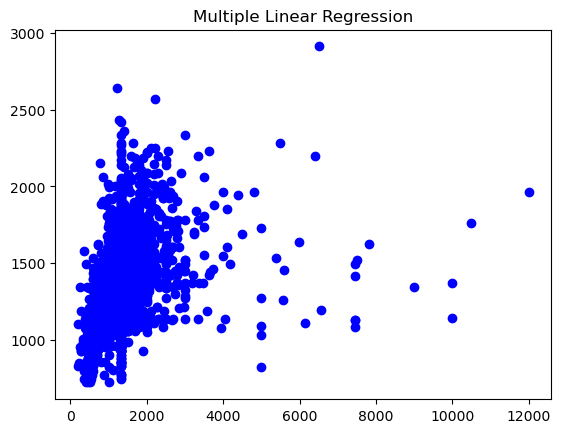

In [38]:
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_pred, color='blue')
plt.show()

# Polynomial Regression

In [39]:
X = df[['availability_365','accommodates','neighbourhood_cleansed', 'beds','bathrooms']]
y = df['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [41]:
poly_model = PolynomialFeatures(degree=3)
X_train_poly = poly_model.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)
X_test_poly = poly_model.transform(X_test)
y_pred = pol_reg.predict(X_test_poly)

In [42]:


# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

MAE:  335.2810810704408
MSE:  537548.8485773067
RMSE:  733.1772286270945
R2 Score:  0.17654253670985454


poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)


columns = ['availability_365','accommodates','neighbourhood_cleansed', 'beds','bathrooms']


for i in range(X.shape[1]):
    y_pred = model.predict(X_poly)
    plt.scatter(X[:, i], y, color='blue', label='Original data')
    plt.scatter(X[:, i], y_pred, color='red', label='Poly prediction') 
    plt.legend(title=columns[i])
    plt.show()

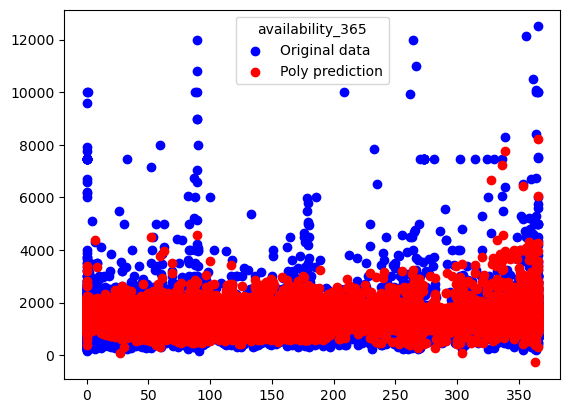

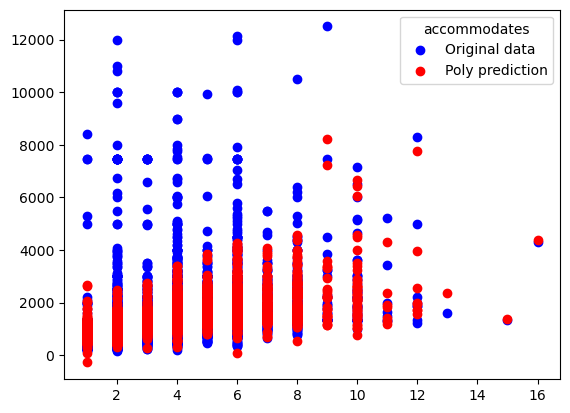

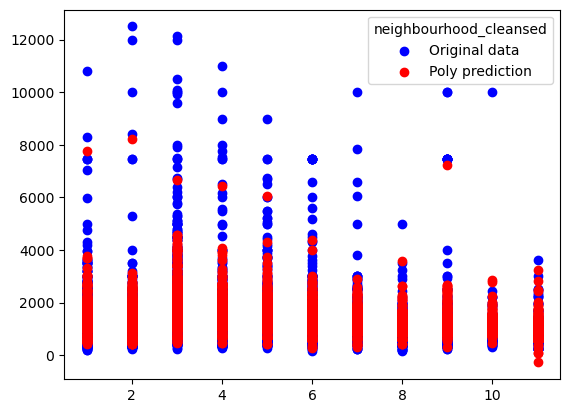

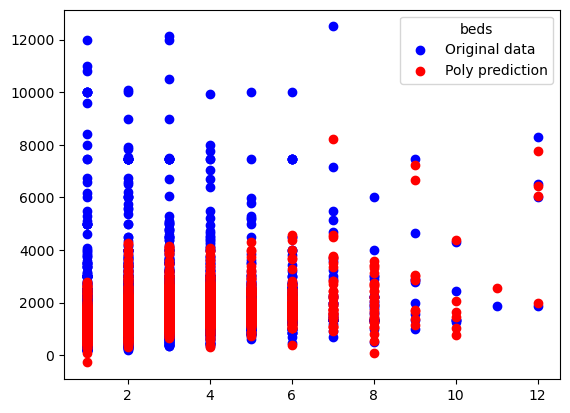

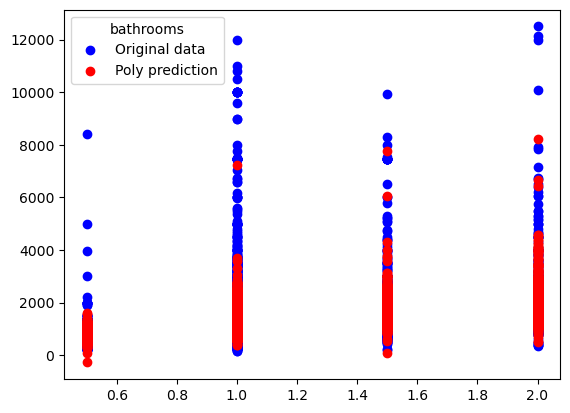

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

columns = ['availability_365','accommodates','neighbourhood_cleansed', 'beds','bathrooms']

for i in range(X.shape[1]):
    y_pred = model.predict(X_poly)
    plt.scatter(X.iloc[:, i], y, color='blue', label='Original data')
    plt.scatter(X.iloc[:, i], y_pred, color='red', label='Poly prediction') 
    plt.legend(title=columns[i])
    plt.show()

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime
from keras.callbacks import TensorBoard
X = df[['availability_365','accommodates','neighbourhood_cleansed', 'beds','bathrooms']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))

# Hidden layer 1
model.add(Dense(32, activation='relu'))

# Hidden layer 2
model.add(Dense(16, activation='relu'))

# Hidden layer 3
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(1))
optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, epochs=50, batch_size=32,callbacks=[tensorboard_callback])

loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

y_pred = model.predict(X_test)

Epoch 1/50


c:\Users\Julius\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 944819.7500 - mean_absolute_error: 674.9857
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 334984.4688 - mean_absolute_error: 323.3262
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 404687.0000 - mean_absolute_error: 337.8956
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 412362.2812 - mean_absolute_error: 334.0976
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 423091.2500 - mean_absolute_error: 339.4189
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 355526.0000 - mean_absolute_error: 318.4670
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 387903.9375 - mean_absolute_error: 320.7890
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 394025.5000 - mean_absolute_error: 324.6553
Epoch 9/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 385705.2812 - mean_absolute_error: 329.5191
Epoch 10/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 343632.7500 - 

In [51]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 4212), started 0:03:36 ago. (Use '!kill 4212' to kill it.)